In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statistics as st

base_dir = os.path.normpath("/Users/celestecohen/Downloads/Biofilm_bioinformatics")

In [ ]:
st_filename = base_dir + os.sep + "filtering_results.csv"
filt=pd.read_csv(st_filename,header=0,sep="\t")
filt["%flocc"]=filt["%flocc"]/100
filt

,Strain,ODf,ODr,ODf+ODr,%flocc,Rep
0,JB50,6.60,0.60,7.20,0.083333,1
1,JB759,5.00,2.40,7.40,0.324324,1
2,JB759,6.80,1.00,7.80,0.128205,1
3,R1,6.80,0.60,7.40,0.081081,1
4,R2,6.20,1.60,7.80,0.205128,1
...,...,...,...,...,...,...
164,R52,1.00,6.40,7.40,0.864865,3
165,R53,5.60,0.21,5.81,0.036145,3
166,R54,0.07,4.20,4.27,0.983607,3
167,JB50,6.40,0.62,7.02,0.088319,3


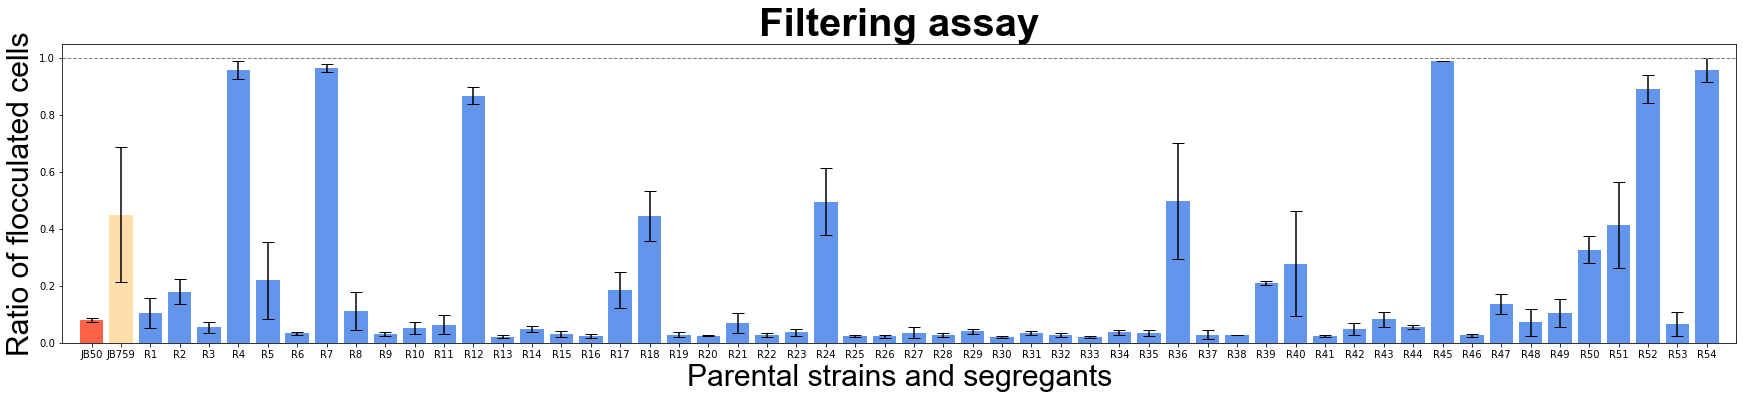

In [ ]:
plt.rcParams["figure.figsize"] = (30,5.5)
fig, ax = plt.subplots()

segregants=['R' + str(ind) for ind in list(range(1,55))]
strain_order=np.concatenate((["JB50","JB759"],segregants))

x=list(range(0,len(set(filt['Strain']))))
y=[filt.loc[filt["Strain"]==name] for name in strain_order]
colours=np.concatenate((["tomato","navajowhite"],np.repeat("cornflowerblue",54)))

ax.bar(x,
       height=[np.mean(yi["%flocc"]) for yi in y],
       yerr=[np.std(yi["%flocc"]) for yi in y],    # error bars
       capsize=6,
       width=0.8,    # bar width,
       color=colours,
       zorder = 0,
        tick_label=strain_order
      )

#for i in range(0,len(x)):
    #for n in range(0,len(y[i]["%flocc"])):
        #ax.scatter(x[i], list(y[i]["%flocc"])[n], color='black', zorder = 1, s=10)
    
ax.set_xlim(-1,56)
ax.set_ylabel('Ratio of flocculated cells',fontsize=30,fontname="Arial")
ax.set_xlabel("Parental strains and segregants",fontsize=30,fontname="Arial")
ax.set_title("Filtering assay",fontsize=40,fontweight="bold",fontname="Arial")
plt.axhline(y=1, color='grey', linestyle='dashed', linewidth=1)

/var/folders/tc/jr3_rfbd30g5r7dmltld5hz80000gn/T/ipykernel_4215/2218008113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_mod["%flocc"][2]=st.mean([filt_mod["%flocc"][1],filt_mod["%flocc"][2]])


Text(0.5, 0, 'Ratio values from Rep 1')

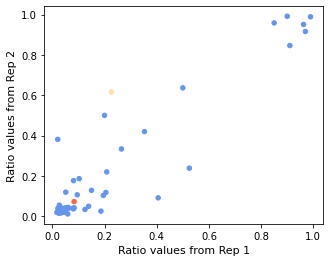

In [ ]:
#Scatter plot of rep1 vs rep2
plt.rcParams["figure.figsize"] = (5,4)
fig, ax = plt.subplots()
filt_mod=filt.copy()
filt_mod["%flocc"][2]=st.mean([filt_mod["%flocc"][1],filt_mod["%flocc"][2]])
filt_mod=filt_mod.drop([1])

x=list(filt_mod.loc[filt_mod["Rep"]==1]["%flocc"])
y=list(filt_mod.loc[filt_mod["Rep"]==2]["%flocc"])
ax.scatter(x,y,color=colours,s=20)

ax.set_ylabel('Ratio values from Rep 2',fontsize=11)
ax.set_xlabel("Ratio values from Rep 1",fontsize=11)


In [ ]:
#prepare for QTL
import re
filt_grouped=filt.groupby("Strain",as_index=False).mean()
phenotype=filt_grouped[["Strain","%flocc"]]

#Make all segregant names R1_x
for p in range(0,len(phenotype["Strain"])):
    if phenotype["Strain"][p][0]=="R":
        phenotype["Strain"][p]=str("R1_"+re.findall("[0-9]+",phenotype["Strain"][p])[0])

#Make parental values X968 (JB50) and Y0036 (JB759)
phenotype["Strain"][np.where(phenotype=="JB50")[0]]="X968"
phenotype["Strain"][np.where(phenotype=="JB759")[0]]="Y0036"

#phenotype.to_csv("filtering_phenotypes.csv")
#remove # above to actually write the file

/var/folders/tc/jr3_rfbd30g5r7dmltld5hz80000gn/T/ipykernel_4215/1073911573.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phenotype["Strain"][p]=str("R1_"+re.findall("[0-9]+",phenotype["Strain"][p])[0])
/var/folders/tc/jr3_rfbd30g5r7dmltld5hz80000gn/T/ipykernel_4215/1073911573.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phenotype["Strain"][np.where(phenotype=="JB50")[0]]="X968"
/var/folders/tc/jr3_rfbd30g5r7dmltld5hz80000gn/T/ipykernel_4215/1073911573.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda